# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Ariel Rodrigues             | RM 331163      | `2IA` |
| Duan Nunes             | RM 330648      | `2IA` |
| Jenifer Caroline             | RM 330720      | `2IA` |
| Juliana Fatima            | RM 330985      | `2IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos e, até mesmo, trechos de código-fonte.

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

O dataset oroginal "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.

__Atualizado em 16/07/2017__

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Apresenta todas as colunas do Dataframe no Jupyter
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Removendo warnings do output do Jupyter
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

# Ativando o matplotlib no Jupyter
%matplotlib inline

In [2]:
#Salvando a tabela para ser trabalhada
tab = pd.read_csv("./data/automobile-mod.csv",sep=";")

In [3]:
# Trazendo os 10 primeiros valores da tabela 
tab.head(10)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante.

In [4]:
#IMPLEMENTAR

# Visualizando matrix de correlação
tab.corr()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.495210,0.148239,0.250313,0.372607,-0.202727,-0.454390,-0.566392,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610324,0.116745,0.159733,0.577923,-0.056354,-0.633185,-0.709308,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.545028,0.186352,0.189867,0.613488,-0.092631,-0.620316,-0.697742,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.186701,-0.086508,0.259737,-0.085544,-0.275686,-0.069029,-0.117146,0.135486
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644871,0.162179,0.156433,0.757762,-0.098857,-0.714663,-0.800276,0.834415
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.577265,0.184605,0.028889,0.821685,-0.104959,-0.619403,-0.671867,0.872335
bore,0.495210,0.610324,0.545028,0.186701,0.644871,0.577265,1.000000,-0.057887,0.001971,0.563921,-0.046081,-0.542294,-0.576674,0.543052
stroke,0.148239,0.116745,0.186352,-0.086508,0.162179,0.184605,-0.057887,1.000000,0.183855,0.092493,-0.065078,-0.079547,-0.071479,0.081434
compression_ratio,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001971,0.183855,1.000000,-0.212984,-0.284202,0.270039,0.207436,0.071107
horsepower,0.372607,0.577923,0.613488,-0.085544,0.757762,0.821685,0.563921,0.092493,-0.212984,1.000000,0.132510,-0.763573,-0.776634,0.810795


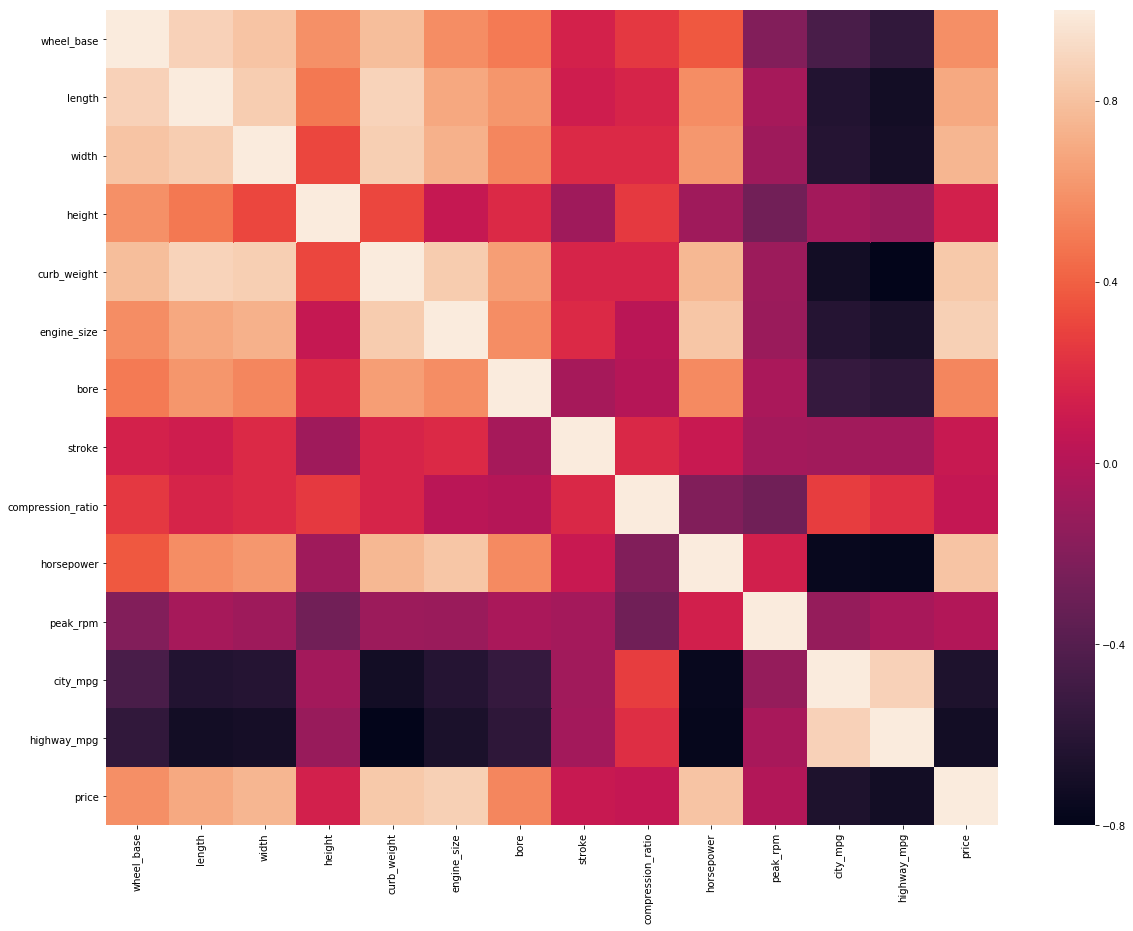

In [5]:
# Aumentando o tamanho do Plot
plt.subplots(figsize=(20,15))

# Mapa de correção por mapa de calor
sns.heatmap(tab.corr())

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**  
Utilizando o gráfico de correlação para analisar todos os valores utilizando o campo **price/preço** como alvo, chegamos as seguintes conclusoes:  
Os maiores campos de correlação positivas com o **price/preço** são a **curb_weight/peso** (com 0.834415) e o **horsepower/HP** (0.810795)  
Os maiores campos de correlação negativa com o **price/preço** são o **city_mpg/consumo em mpg na cidade** (-0.657661) e **highway_mp/consumo em mpg na estrada** (-0.712812).  
Os campos mais fracos de correlação com **price/preço** é **stroke/diametro do pisao** (0.081434) e **peak_rpm/pico de RPM**

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

In [6]:
# Convertendo "tab"de lista para DataFrame

tab = pd.read_csv("./data/automobile-mod.csv",sep=";")
tab = pd.DataFrame(tab)

In [7]:
# Criando uma copia da tabela
tab_orig = tab.copy()

# Criando dataset normalizado
tab_norm = tab.copy()

In [8]:
# Tirando os valores de string e mantendo só os numericos para criar o boxplot
tab_norm = tab_norm.drop('make', axis=1)
tab_norm = tab_norm.drop('fuel_type', axis=1)
tab_norm = tab_norm.drop('fuel_system', axis=1)
tab_norm = tab_norm.drop('number_of_doors', axis=1)
tab_norm = tab_norm.drop('engine_location', axis=1)
tab_norm = tab_norm.drop('aspiration', axis=1)
tab_norm = tab_norm.drop('body_style', axis=1)
tab_norm = tab_norm.drop('drive_wheels', axis=1)
tab_norm = tab_norm.drop('engine_type', axis=1)
tab_norm = tab_norm.drop('number_of_cylinders', axis=1)

In [9]:
# Normalização dos dados e salvando  na base 
tab_norm["wheel_base"] = tab_norm["wheel_base"].div(tab_norm["wheel_base"].sum(), axis=0)
tab_norm["length"] = tab_norm["length"].div(tab_norm["length"].sum(), axis=0)
tab_norm["height"] = tab_norm["height"].div(tab_norm["height"].sum(), axis=0)
tab_norm["width"] = tab_norm["width"].div(tab_norm["width"].sum(), axis=0)
tab_norm["curb_weight"] = tab_norm["curb_weight"].div(tab_norm["curb_weight"].sum(), axis=0)
tab_norm["engine_size"] = tab_norm["engine_size"].div(tab_norm["engine_size"].sum(), axis=0)
tab_norm["stroke"] = tab_norm["stroke"].div(tab_norm["stroke"].sum(), axis=0)
tab_norm["compression_ratio"] = tab_norm["compression_ratio"].div(tab_norm["compression_ratio"].sum(), axis=0)
tab_norm["bore"] = tab_norm["bore"].div(tab_norm["bore"].sum(), axis=0)
tab_norm["stroke"] = tab_norm["stroke"].div(tab_norm["stroke"].sum(), axis=0)
tab_norm["horsepower"] = tab_norm["horsepower"].div(tab_norm["horsepower"].sum(), axis=0)
tab_norm["peak_rpm"] = tab_norm["peak_rpm"].div(tab_norm["peak_rpm"].sum(), axis=0)
tab_norm["city_mpg"] = tab_norm["city_mpg"].div(tab_norm["city_mpg"].sum(), axis=0)
tab_norm["highway_mpg"] = tab_norm["highway_mpg"].div(tab_norm["highway_mpg"].sum(), axis=0)
tab_norm["price"] = tab_norm["price"].div(tab_norm["price"].sum(), axis=0)

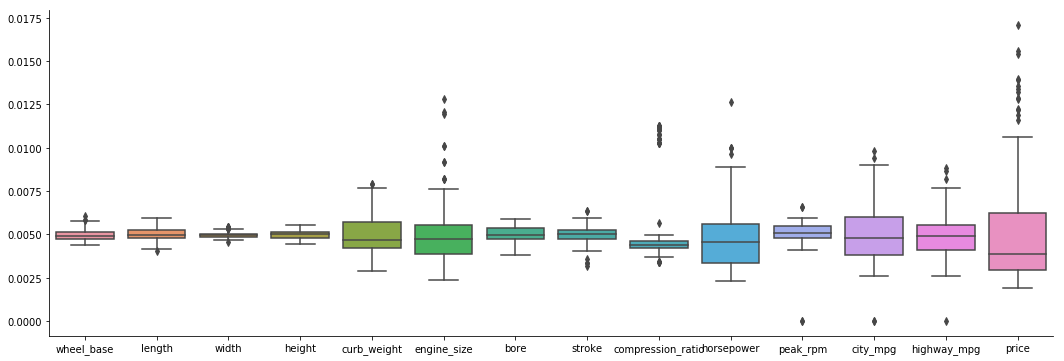

In [10]:
# Configuraçoes para a exibição de todas as colunas em um unico grafico
fig, ax = plt.subplots()
fig.set_size_inches(18, 6)
sns.boxplot(ax=ax, data=tab_norm)
sns.despine()

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [11]:
# Abaixo é mostrado todos as colunas e a quantidade de valores nulos que se encontra em cada uma
tab.isnull().sum()

make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               2
city_mpg               1
highway_mpg            1
price                  0
dtype: int64

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.

In [12]:
#IMPLEMENTAÇÃO

# Analisando os valores com indices nulos
tab[pd.isnull(tab).any(axis=1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,four,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2300,ohc,four,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995


In [13]:
# Identificando outros valores com caracteristicas semelhantes para o campo Highway MPG Nulo
tab[(tab["fuel_type"]=="gas") & 
    (tab["aspiration"]=="std") &
    (tab["body_style"]=="hatchback") & 
    (tab["drive_wheels"]=="fwd") & 
    (tab["engine_type"]=="ohc") &
    (tab["fuel_system"]=="1bbl")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
29,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58,4800.0,49.0,54.0,6479
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000.0,31.0,38.0,6855
31,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.1,60,5500.0,38.0,42.0,5399
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
37,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2289,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800.0,27.0,33.0,9095


In [14]:
# Apos identificado, o valor deverá receber a média dos carros com caracteristicas proximas
# Inserindo a média em Highway MPG
tab["highway_mpg"] = tab["highway_mpg"].fillna(round(tab[(tab["fuel_type"]=="gas") & 
                                                    (tab["aspiration"]=="std") &
                                                    (tab["body_style"]=="hatchback") & 
                                                    (tab["drive_wheels"]=="fwd") & 
                                                    (tab["engine_type"]=="ohc") &
                                                    (tab["fuel_system"]=="1bbl")].mean()["highway_mpg"]))

In [15]:
# Identificando outros valores com caracteristicas semelhantes para o campo City MPG Nulo
tab[(tab["fuel_type"]=="gas") & 
    (tab["aspiration"]=="std") &
    (tab["body_style"]=="hatchback") & 
    (tab["drive_wheels"]=="fwd") & 
    (tab["engine_type"]=="ohc") &
    (tab["fuel_system"]=="1bbl")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
29,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58,4800.0,49.0,54.0,6479
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1819,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000.0,31.0,38.0,6855
31,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,four,79,1bbl,2.91,3.07,10.1,60,5500.0,38.0,42.0,5399
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,39.0,6529
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1956,ohc,four,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2236,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895
37,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,53.3,2289,ohc,four,110,1bbl,3.15,3.58,9.0,86,5800.0,27.0,33.0,9095


In [16]:
# Apos identificado, o valor deverá receber a média dos carros com caracteristicas proximas
tab["city_mpg"] = tab["city_mpg"].fillna(round(tab[(tab["fuel_type"]=="gas") & 
                                              (tab["aspiration"]=="std") &
                                              (tab["body_style"]=="hatchback") & 
                                              (tab["drive_wheels"]=="fwd") & 
                                              (tab["engine_type"]=="ohc") &
                                              (tab["fuel_system"]=="1bbl")].mean()["city_mpg"]))

In [17]:
# Identificando valores proximos para o carro do indice 184, com informacoes nulas em Peak RPM
tab[(tab["fuel_type"]=="gas") & 
    (tab["aspiration"]=="std") &
    (tab["body_style"]=="hatchback") & 
    (tab["drive_wheels"]=="fwd") & 
    (tab["engine_type"]=="ohc") &
    (tab["fuel_system"]=="mpfi")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
127,renault,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.70,90,5500.0,23.0,31.0,9895
128,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2658,ohc,four,121,mpfi,3.54,3.07,9.31,110,5250.0,21.0,28.0,11850
130,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.30,110,5250.0,21.0,28.0,15040
171,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2414,ohc,four,122,mpfi,3.31,3.54,8.70,92,4200.0,27.0,32.0,9988
173,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2458,ohc,four,122,mpfi,3.31,3.54,8.70,92,4200.0,27.0,32.0,11248
186,volkswagen,gas,std,two,hatchback,fwd,front,94.5,165.7,64.0,51.4,2221,ohc,four,109,mpfi,3.19,3.40,8.50,90,5500.0,24.0,29.0,9980


In [18]:
# Apos identificado, o valor deverá receber a média dos carros com caracteristicas proximas
tab.at[184, 'peak_rpm'] = round(tab[(tab["fuel_type"]=="gas") & 
                                    (tab["aspiration"]=="std") &
                                    (tab["body_style"]=="sedan") & 
                                    (tab["drive_wheels"]=="fwd") & 
                                    (tab["engine_type"]=="ohc") &
                                    (tab["fuel_system"]=="mpfi")].mean()["peak_rpm"])

In [19]:
# O Carro do Indice 136 não possui carros com as caracteristicas, neste caso retirados o campo
# drive_wheels, que apresentou valores aproximados para carros da mesma marca. 
tab[(tab["fuel_type"]=="gas") & 
    (tab["aspiration"]=="std") &
    (tab["body_style"]=="hatchback") & 
    (tab["engine_type"]=="ohcf") &
    (tab["fuel_system"]=="2bbl")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
134,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900.0,31.0,36.0,5118
135,subaru,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400.0,26.0,31.0,7053
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,55.7,2240,ohcf,four,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603


In [20]:
# Dessa forma o valor nulo irá receber a média dos carros com caracteristicas proximas
tab.at[136, 'peak_rpm'] = round(tab[(tab["fuel_type"]=="gas") & 
                                    (tab["aspiration"]=="std") &
                                    (tab["body_style"]=="hatchback") & 
                                    (tab["engine_type"]=="ohcf") &
                                    (tab["fuel_system"]=="2bbl")].mean()["peak_rpm"])

In [21]:
# Verificando colunas com dados nulos
tab[pd.isnull(tab).any(axis=1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


**Resposta:**  
Os campos com valores nulos foram substituidos pela média dos carros com caracteristicas parecidas, considerando alguns valores categóricos. Fazendo dessa forma podemos ter um resultado mais próximo do real, já que caracteristicas próximas podem nos dar uma idéia do comportamento de dados que não possuem essas informações disponiveis.

### Análise de valores com valores iguais a 0

Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [22]:
#IMPLEMENTAÇÃO

# Verificando colunas que possuem zero
tab.all() == 0

make                   False
fuel_type              False
aspiration             False
number_of_doors        False
body_style             False
drive_wheels           False
engine_location        False
wheel_base             False
length                 False
width                  False
height                 False
curb_weight            False
engine_type            False
number_of_cylinders    False
engine_size            False
fuel_system            False
bore                   False
stroke                 False
compression_ratio      False
horsepower             False
peak_rpm                True
city_mpg                True
highway_mpg             True
price                  False
dtype: bool

A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.

In [23]:
#IMPLEMENTAÇÃO

# Verificacao dos dados zerados
tab[(tab["peak_rpm"]==0) | 
    (tab["city_mpg"]==0) |
    (tab["highway_mpg"]==0)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,52.6,1940,ohc,four,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,39.0,6529
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,58.3,2024,ohc,four,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2212,ohc,four,109,mpfi,3.19,3.40,9.0,85,5250.0,0.0,34.0,8195


In [24]:
# Colocando valores da média dos carros com as caracteristicas parecidas
# Coluna peak_rpm
tab.at[32, 'peak_rpm'] = round(tab[(tab["fuel_type"]=="gas") & 
                                    (tab["aspiration"]=="std") &
                                    (tab["body_style"]=="hatchback") & 
                                    (tab["drive_wheels"]=="fwd") & 
                                    (tab["engine_type"]=="ohc") &
                                    (tab["fuel_system"]=="1bbl")].mean()["peak_rpm"])

tab.at[35, 'peak_rpm'] = round(tab[(tab["fuel_type"]=="gas") & 
                                    (tab["aspiration"]=="std") &
                                    (tab["body_style"]=="wagon") & 
                                    (tab["drive_wheels"]=="fwd") & 
                                    (tab["engine_type"]=="ohc")].mean()["peak_rpm"])

In [25]:
# Colocando valores da média dos carros com as caracteristicas parecidas
# Coluna city_mpg
tab.at[66, 'city_mpg'] = round(tab[(tab["fuel_type"]=="diesel") & 
                                   (tab["aspiration"]=="turbo") &
                                   (tab["drive_wheels"]=="rwd") & 
                                   (tab["engine_type"]=="ohc") &
                                   (tab["fuel_system"]=="idi")].mean()["city_mpg"])

tab.at[181, 'city_mpg'] = round(tab[(tab["fuel_type"]=="gas") & 
                                    (tab["aspiration"]=="std") &
                                    (tab["body_style"]=="sedan") & 
                                    (tab["drive_wheels"]=="fwd") & 
                                    (tab["engine_type"]=="ohc") &
                                    (tab["fuel_system"]=="mpfi")].mean()["city_mpg"])

In [26]:
# Colocando valores da média dos carros com as caracteristicas parecidas
# Coluna highway_mpg

tab.at[67, 'highway_mpg'] = round(tab[(tab["fuel_type"]=="diesel") & 
                                    (tab["aspiration"]=="turbo") &
                                    (tab["body_style"]=="sedan") & 
                                    (tab["drive_wheels"]=="rwd") & 
                                    (tab["engine_type"]=="ohc") &
                                    (tab["fuel_system"]=="idi")].mean()["highway_mpg"])

In [27]:
# Validacao de valores com zero
tab[(tab["peak_rpm"]==0) | 
    (tab["city_mpg"]==0) |
    (tab["highway_mpg"]==0)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [28]:
def identificacao_outlier(df, column_name): 
    print(column_name)
    
    #IMPLEMENTAÇÃO
    
    # Primeiro e terceiro quartil
    q1, q3 = np.percentile(df[column_name], [25, 75])
    
    # Diferença entre os quartis
    diff = q3 - q1
    
    # Corte limite para outliers para maximo
    outlier_upper = q3 + (diff * 5)
    
    # Corte limite para outliers para minimo
    outlier_lower = q1 - (diff * 5)

    print(outlier_upper + outlier_lower)
    print(outlier_upper)
    print(outlier_lower)

    return df[(df[column_name]>outlier_upper) | (df[column_name]<outlier_lower)]

In [29]:
identificacao_outlier(tab, "wheel_base")

wheel_base
196.9
141.90000000000003
54.99999999999997


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [30]:
identificacao_outlier(tab, "length")

length
350.3
266.99999999999994
83.30000000000007


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [31]:
identificacao_outlier(tab, "width")

width
130.7
79.1
51.599999999999994


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [32]:
identificacao_outlier(tab, "height")

height
107.5
73.0
34.5


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [33]:
identificacao_outlier(tab, "curb_weight")

curb_weight
5095.0
6711.0
-1616.0


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [34]:
identificacao_outlier(tab, "engine_size")

engine_size
239.0
356.0
-117.0


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [35]:
identificacao_outlier(tab, "bore")

bore
6.7299999999999995
5.73
0.9999999999999991


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [36]:
identificacao_outlier(tab, "stroke")

stroke
6.57
5.210000000000001
1.3599999999999994


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [37]:
identificacao_outlier(tab, "compression_ratio")

compression_ratio
18.0
13.400000000000004
4.599999999999996


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
60,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650.0,36.0,42.0,10795
63,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72,4200.0,31.0,39.0,18344
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,25552
65,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,28248
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350.0,18.0,25.0,28176
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350.0,22.0,17.0,31600
87,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55,4800.0,45.0,50.0,7099
105,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,13200
107,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,four,152,idi,3.70,3.52,21.0,95,4150.0,25.0,25.0,13860
109,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,16900


In [38]:
# Verificando se os outliers encontrados na categoria Diesel é igual ao total de carros a Diesel da base
len(identificacao_outlier(tab, "compression_ratio")) == len(tab[tab["fuel_type"] == "diesel"])

compression_ratio
18.0
13.400000000000004
4.599999999999996


True

In [39]:
identificacao_outlier(tab, "horsepower")

horsepower
186.0
346.0
-160.0


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [40]:
identificacao_outlier(tab, "peak_rpm")

peak_rpm
10300.0
9000.0
1300.0


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [41]:
identificacao_outlier(tab, "city_mpg")

city_mpg
49.0
85.0
-36.0


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [42]:
identificacao_outlier(tab, "highway_mpg")

highway_mpg
59.0
79.0
-20.0


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [43]:
identificacao_outlier(tab, "price")

price
24275.0
60125.0
-35850.0


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:**
Não foram encontrados dados discrepantes que entregassem valor para a analise. O Passo limite é bem alto e isso acaba deixando a margem para possivel identificação de outliers também alta. Os dados referentes ao campo *compression_rate*, apesar de serem sinalizados pela técnica, não apresentam risco a analise, já que é uma caracteristica para carros que utilizam diesel como combustivel e a quantidade de ocorrencias de retorno do metodo de Tukey comparado com o total de carros a diesel na base inteira é igual. Portanto, a hipotese de que carros que possuem valores maiores do que 18.0 no campo *compression_ratio* foi rejeitada, considerando a nossa base da analise.

#### Extra: Analise de Outliers em dados categoricos

In [44]:
def valida_categorias(df, column):
    # Lista de cada categoria encontrada na coluna
    labels = list(df[column].unique())

    print("Para a coluna '{0}'...".format(column))
    for x in labels:
        print('Temos {0} carros como {1}'.format(len(df.loc[df[column] == x]), x))
    print("\n")

In [45]:
for x in tab.columns:
    if tab[x].dtypes in ["object"]:
        valida_categorias(tab, x)

Para a coluna 'make'...
Temos 3 carros como alfa-romero
Temos 6 carros como audi
Temos 8 carros como bmw
Temos 3 carros como chevrolet
Temos 9 carros como dodge
Temos 13 carros como honda
Temos 2 carros como isuzu
Temos 3 carros como jaguar
Temos 17 carros como mazda
Temos 8 carros como mercedes-benz
Temos 1 carros como mercury
Temos 13 carros como mitsubishi
Temos 18 carros como nissan
Temos 11 carros como peugot
Temos 7 carros como plymouth
Temos 4 carros como porsche
Temos 2 carros como renault
Temos 6 carros como saab
Temos 12 carros como subaru
Temos 32 carros como toyota
Temos 12 carros como volkswagen
Temos 11 carros como volvo


Para a coluna 'fuel_type'...
Temos 181 carros como gas
Temos 20 carros como diesel


Para a coluna 'aspiration'...
Temos 165 carros como std
Temos 36 carros como turbo


Para a coluna 'number_of_doors'...
Temos 87 carros como two
Temos 114 carros como four


Para a coluna 'body_style'...
Temos 6 carros como convertible
Temos 68 carros como hatchback
Tem

In [46]:
tab[tab["engine_type"] == 'l']

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
17,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100.0,47.0,53.0,5151
104,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3020,l,four,120,mpfi,3.46,3.19,8.4,97,5000.0,19.0,24.0,11900
105,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,13200
106,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3230,l,four,120,mpfi,3.46,3.19,8.4,97,5000.0,19.0,24.0,12440
107,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3430,l,four,152,idi,3.70,3.52,21.0,95,4150.0,25.0,25.0,13860
108,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,15580
109,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3252,l,four,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,16900
110,peugot,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.19,8.4,95,5000.0,19.0,24.0,16695
111,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3485,l,four,152,idi,3.70,3.52,21.0,95,4150.0,25.0,25.0,17075
112,peugot,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,3.19,8.4,97,5000.0,19.0,24.0,16630


**Resposta:**  
A Ideia dessa validação foi devido ao campo *engine_type*, que possui uma variavel chamada "l".  
Ao pesquisar, esse tipo de motor realmente existe - [Link de referencia](https://en.wikipedia.org/wiki/Toyota_L_engine). Neste caso vamos manter esses dados durante a analise. 

### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [47]:
#IMPLEMENTAÇÃO

# Funcao para mameamento de dados categoricos
def mapear_serie(serie):
    dict_gen = {}
    
    # Obtendo os valores unicos
    valores = serie.unique()
    i = 0
    
    # Iteracao entre os valores e incrementando o contador
    for x in valores:
        i += 1
        dict_gen.update({x:i})
            
    return dict_gen

In [48]:
# Teste da funcao
mapear_serie(tab["body_style"])

{'convertible': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4, 'hardtop': 5}

In [49]:
# Funcao para mapeamento de dados quantitativos
def mapear_quantitativos(df):
    # Mapeamento do campo de cilindros, por ser valor quantitativo
    cilindros = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
    df.loc[:,"number_of_cylinders"] = df["number_of_cylinders"].map(cilindros)

    # Mapeamento do campo de numero de portas, por ser valor quantitativo
    portas = {'two': 2, 'four': 4}
    df.loc[:,"number_of_doors"] = df["number_of_doors"].map(portas)

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [50]:
# IMPLEMENTAÇÃO 

# Campos quantitativos
mapear_quantitativos(tab)

# Demais campos categoricos
for x in tab.columns:
    if tab[x].dtypes in ["object"]:
        tab.loc[:,x] = tab[x].map(mapear_serie(tab[x]))

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [51]:
#IMPLEMENTAÇÃO

# Validando se todas as colunas são do tipo numérico
tab.dtypes

make                     int64
fuel_type                int64
aspiration               int64
number_of_doors          int64
body_style               int64
drive_wheels             int64
engine_location          int64
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type              int64
number_of_cylinders      int64
engine_size              int64
fuel_system              int64
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm               float64
city_mpg               float64
highway_mpg            float64
price                    int64
dtype: object

In [52]:
tab.head(20)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,1,4,130,1,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,1,1,1,2,1,1,1,88.6,168.8,64.1,48.8,2548,1,4,130,1,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,1,1,1,2,2,1,1,94.5,171.2,65.5,52.4,2823,2,6,152,1,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,2,1,1,4,3,2,1,99.8,176.6,66.2,54.3,2337,3,4,109,1,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,2,1,1,4,3,3,1,99.4,176.6,66.4,54.3,2824,3,5,136,1,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,2,1,1,2,3,2,1,99.8,177.3,66.3,53.1,2507,3,5,136,1,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,2,1,1,4,3,2,1,105.8,192.7,71.4,55.7,2844,3,5,136,1,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,2,1,1,4,4,2,1,105.8,192.7,71.4,55.7,2954,3,5,136,1,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,2,1,2,4,3,2,1,105.8,192.7,71.4,55.9,3086,3,5,131,1,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,3,1,1,2,3,1,1,101.2,176.8,64.8,54.3,2395,3,4,108,1,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**  
As explicações estão abaixo:

***Regressão linear***
O algoritmo de regressão linear utiliza o dataset de treinamento para ajustar os pesos dos parametros de uma equação da reta a fim de explicar a tendencia do comportamento dos dados. 
Assim é possivel predizer o comportamento de um novo evento calculando o resultado da equação.

***Exemplo*** de regressão linear utilizando dados com alta correlação positivas, ***price/preço*** são a ***curb_weight/peso***, gera uma equação da reta com coeficiente angular positivo, ou seja, crescente. 
Nos dados avaliados verificamos que quanto maior o peso do carro maior também preço.

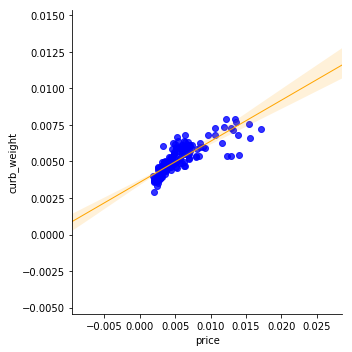

In [53]:
# Grafico de regressão entre price e curb_weight
sns.lmplot("price", 
           "curb_weight", 
           tab_norm,
           scatter_kws={"marker":"x", "color":"blue"},
           line_kws={"linewidth":1, "color": "orange"})

Exemplo de regressão utilizando dados com alta correlação negativa, ***price/preço*** são a ***highway_mpg/consumo em mpg na estrada***, gera uma equação da reta com coeficiente angular negativo, ou seja, decrescente. 
Nos dados avaliados verificamos que quanto maior o consumo em mpg na estrada maior será o preço do carro.

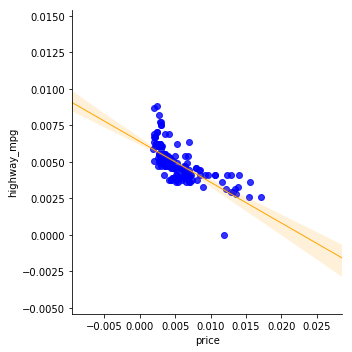

In [54]:
# Grafico de regressão entre price e highway_mpg
sns.lmplot("price", 
           "highway_mpg", 
           tab_norm,
           scatter_kws={"marker":"x", "color":"blue"},
           line_kws={"linewidth":1, "color": "orange"})

**Regressão de Árvore de Decisão**  
O algoritmo de árvore de decisão utiliza o dataset de treinamento para gerar uma sequencia de regras. Essas regras discriminam os dados a fim de explicar seu comportamento em relação a variavel dependente, assim com novos parametros é possivel predizer a classe a que pertence verificando a qual regra esse novo evento se encaixa.

# Extra: Instalando o graphviz 

Através do graphviz podemos visualizar a árvore de decisão, e para conseguir ter essa visão é necessário instalar o software no SO e a lib do Python.  
Para isso, é necessário acessar o link https://graphviz.gitlab.io/download/  

Existem distribuições para MAC, Windows, Linux e outros.

No caso de Windows, setar a variavel de ambiente no PATH

Após isso, é necessário instalar a lib no Python:

In [55]:
!pip install graphviz

Abaixo é possível verificar a ramificação da árvore em gráficos.  
Basta deslizar a barra para encontrar as divisões do algoritmo.

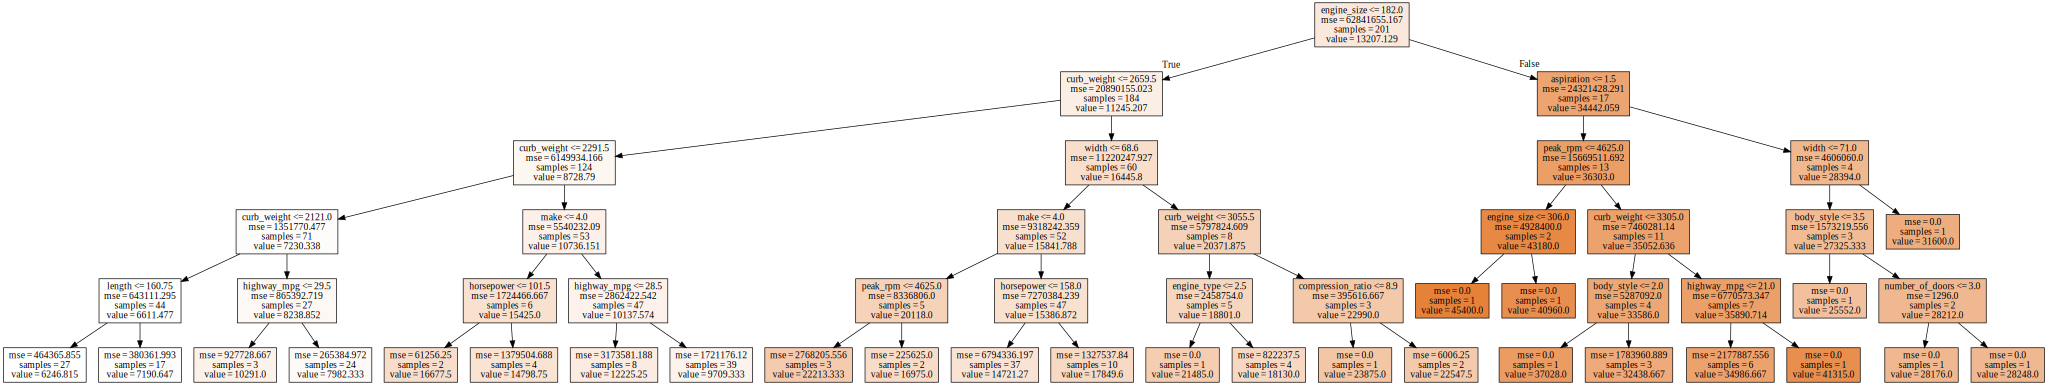

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from graphviz import Source
from sklearn import tree
from IPython.display import SVG

X_arvore = tab.copy()
y_arvore = X_arvore['price'].values
X_arvore = X_arvore.drop('price', axis=1)
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_arvore, y_arvore)

# Quebra da Arvore
labels = tab.columns.values[:-1]
graph = Source(tree.export_graphviz(regressor, out_file=None, feature_names=labels, filled = True))
display(SVG(graph.pipe(format='svg')))

Exemplo de regra usando a arvore de regressão acima:  

Se um novo carro tem o:  
 - engine_size <= 182.0  
 - curb_weight <= 2659.5  
 - curb_weight <= 2291.5   

Então:
A predição para o preço é de 7230.338.
    
O modelo de Árvore de Decisão gera um conjunto de regras mais simples de interpretar que a regressão linear.

**Regressão Ridge**  
A Ridge Regression é um método que suaviza os atributos que estão relacionados diminuindo o ruído no modelo. 
Com a retirada de determinados atributos do modelo, o mesmo converge para um resultado muito mais estável mantendo a acurácia do modelo. O algoritmo penaliza os atributos que contribuem menos para o poder preditivo colocando um viés.

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e qual seria o atributo preditor?

***Resposta:***  
As respostas estão abaixo:

***Atributos a serem utilizados:***

Utilizaremos 2 conjuntos para realizar os testes:

**1**
Para este conjunto de dados, será utilizado como atributos:

    make, fuel_type, aspiration, body_style, drive_wheels, wheel_base, length, width,height, curb_wheight, engine_type, number_of_cylinders, engine_size, fuel_system, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, highway_mpg.



***Atributo preditor:***
    
    price
    
**2**
Para este conjunto de dados, será utilizado como atributos:

    number_of_doors, wheel_base, length, width, height, curb_weight, number_of_cylinders, engine_size, bore, stroke, compression_ratio, peak_rpm, city_mpg, highway_mpg



***Atributo preditor:***
    
    price

Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros.

In [57]:
from sklearn.model_selection import train_test_split

# Tamanho em porcentagem da amostra de teste
split_test_size = 0.30

# Separando atributos
X_modelo = tab.copy()
y_modelo = tab["price"]
X_modelo.drop("price", axis=1, inplace=True)

X_treino, X_teste, y_treino, y_teste = train_test_split(X_modelo, 
                                                        y_modelo, 
                                                        test_size=split_test_size, 
                                                        random_state=42)

Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [58]:
#IMPLEMENTAÇÃO

# Inspeção de X_treino
X_treino.head(5)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
97,13,1,1,4,3,2,1,97.2,173.4,65.2,54.7,2302,3,4,120,2,3.33,3.47,8.5,97,5200.0,27.0,34.0
31,6,1,1,2,2,2,1,93.7,150.0,64.0,52.6,1837,3,4,79,4,2.91,3.07,10.1,60,5500.0,38.0,42.0
12,3,1,1,4,3,1,1,101.2,176.8,64.8,54.3,2765,3,6,164,1,3.31,3.19,9.0,121,4250.0,21.0,28.0
35,6,1,1,4,4,2,1,96.5,157.1,63.9,58.3,2024,3,4,92,4,2.92,3.41,9.2,76,4633.0,30.0,34.0
119,15,1,1,4,3,2,1,93.7,167.3,63.8,50.8,2191,3,4,98,2,2.97,3.23,9.4,68,5500.0,31.0,38.0


In [59]:
#IMPLEMENTAÇÃO

#Inspeção de Y_treino
y_treino.head(5)

97      9549
31      5399
12     21105
35      7295
119     7609
Name: price, dtype: int64

In [60]:
#IMPLEMENTAÇÃO

# Inspeção de X_treino
X_teste.head(5)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
95,13,1,1,2,5,2,1,95.1,162.4,63.8,53.3,2008,3,4,97,2,3.15,3.29,9.40,69,5200.0,31.0,37.0
15,3,1,1,2,3,1,1,103.5,193.8,67.9,53.7,3380,3,6,209,1,3.62,3.39,8.00,182,5400.0,16.0,22.0
30,6,1,1,2,2,2,1,86.6,144.6,63.9,50.8,1819,3,4,92,4,2.91,3.41,9.20,76,6000.0,31.0,38.0
158,20,1,1,4,3,2,1,95.7,166.3,64.4,52.8,2140,3,4,98,2,3.19,3.03,9.00,70,4800.0,28.0,34.0
128,18,1,1,2,2,2,1,99.1,186.6,66.5,56.1,2658,3,4,121,1,3.54,3.07,9.31,110,5250.0,21.0,28.0


In [61]:
#IMPLEMENTAÇÃO

#Inspeção de Y_treino
y_teste.head(5)

95      8249
15     41315
30      6855
158     9258
128    11850
Name: price, dtype: int64

Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divida o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [62]:
#IMPLEMENTAÇÃO
print("{0:0.2f}% no conjunto de treinamento.".format((len(X_treino)/len(X_modelo)) * 100))
print("{0:0.2f}% no conjunto de teste.".format((len(X_teste)/len(X_modelo)) * 100))

69.65% no conjunto de treinamento.
30.35% no conjunto de teste.


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [63]:
from sklearn import linear_model

#IMPLEMENTAÇÃO

# Criando modelo de Regressão Linear
lr_model = linear_model.LinearRegression()

In [64]:
# Treina o modelo e verifica o tempo de execução
%time lr_model.fit(X_treino, y_treino.ravel())

CPU times: user 2.25 ms, sys: 4.03 ms, total: 6.28 ms
Wall time: 12 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [65]:
#IMPLEMENTAÇÃO
from sklearn.metrics import mean_squared_error,r2_score

# Predicao de valores
y_pred = lr_model.predict(X_teste)

# Cálculo R2, apresenta o erro quadrático médio. 
# Conhecido como Coeficiente de determinação ajustado.
print('R2 score: %.2f' % r2_score(y_teste, y_pred))

# Cálculo Mean Absolute Error (MAE).
# Apresenta a soma de todos os erros e divide pela quantidade de erros.
print('R2 score: %.2f' % lr_model.score(X_teste, y_teste))

R2 score: 0.87
R2 score: 0.87


### Regressão de árvore de Decisão

In [66]:
from sklearn import tree

#IMPLEMENTAÇÃO

# Inicia modelo de Ávore de Regressão
dtr_model = tree.DecisionTreeRegressor()

In [67]:
# Treina o modelo e verifica o tempo de execução
%time dtr_model.fit(X_treino, y_treino.ravel())

CPU times: user 2.11 ms, sys: 1.14 ms, total: 3.25 ms
Wall time: 2.89 ms


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [68]:
#IMPLEMENTAÇÃO
from sklearn.metrics import mean_squared_error,r2_score

# Predicao de valores
y_pred = dtr_model.predict(X_teste)

# Cálculo R2, apresenta o erro quadrático médio. 
# Conhecido como Coeficiente de determinação ajustado.
print('R2 score: %.2f' % r2_score(y_teste, y_pred))

# Cálculo Mean Absolute Error (MAE).
# Apresenta a soma de todos os erros e divide pela quantidade de erros.
print('R2 score: %.2f' % dtr_model.score(X_teste, y_teste))

R2 score: 0.92
R2 score: 0.92


### Regressão Ridge

In [69]:
# Inicia o modelo de Regressão Linear Ridge
#IMPLEMENTAÇÃO

lrr_model = linear_model.Ridge()

In [70]:
# Treina o modelo
%time lrr_model.fit(X_treino, y_treino.ravel())

CPU times: user 5.87 ms, sys: 3.91 ms, total: 9.77 ms
Wall time: 9.47 ms


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [71]:
#IMPLEMENTAÇÃO
from sklearn.metrics import mean_squared_error,r2_score

# Predicao de valores
y_pred = lrr_model.predict(X_teste)

# Cálculo R2, apresenta o erro quadrático médio. 
# Conhecido como Coeficiente de determinação ajustado.
print('R2 score: %.2f' % r2_score(y_teste, y_pred))

# Cálculo Mean Absolute Error (MAE).
# Apresenta a soma de todos os erros e divide pela quantidade de erros.
print('R2 score: %.2f' % lrr_model.score(X_teste, y_teste))

R2 score: 0.86
R2 score: 0.86


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:** 
Os algoritmos trabalham melhor com poucas variaveis categoricas. Para reduzir o número de categorias pode-se usar atributos dos códigos,ou variáveis binárias para cada categoria.
Alguns algoritmos têm dificuldade em entender variáveis que têm mais de uma categoria. Exemplo é a regressão linear que entende que é uma variavel continua (0,1,2,3...).

Ja a arvore de decisão tem objetivo de separar as em grupos cada vez menores e mais homogêneos em ao desfecho de interesse, isto é, encontrar regras que discriminem dois grupos previamente conhecidos. Além de lidar bem com todo tipo de preditor e realizar seleção de variaveis.

Com base nisso, na nossa base de dados contém algumas variaveis categoricas e na pontuação obtida no R2 score o melhor modelo a ser utilizado é a arvore de decisão.

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [72]:
from sklearn.model_selection import GridSearchCV

# Iniciando os parametros para analise no GRID
parameters = {"normalize":[True, False]}

# Executando o GRID
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')

In [73]:
# Treinando o modelo com o resultado do GRID, e verifica o tempo de execucao
%time opt_model_lr.fit(X_treino, y_treino.ravel())

CPU times: user 35.4 ms, sys: 5.71 ms, total: 41.1 ms
Wall time: 23.6 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [74]:
# IMPLEMENTAÇÃO

# Verificando o score do modelo, e os melhores conjuntos de parametros retornados pelo GRID.
# Dados de treino
opt_model_lr.score(X_treino, y_treino.ravel()), opt_model_lr.best_estimator_

(0.8925732798437067,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

E também para os dados de testes.

In [75]:
# IMPLEMENTAÇÃO

# Verificando o score do modelo, e os melhores conjuntos de parametros retornados pelo GRID.
# Dados de teste
opt_model_lr.score(X_teste, y_teste.ravel()), opt_model_lr.best_estimator_

(0.869724491404924,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [76]:
# Iniciando os parametros para analise no GRID
parameters = {"criterion":["mse", "mae", "friedman_mse"],
              "splitter":["best", "random"],
              "max_depth":[None, 3, 10],
              "min_samples_split":[2, 5],
              "min_samples_leaf":[1, 2],
              "max_features": [None, "sqrt", "log2"],
              "random_state": [42],
              "max_leaf_nodes":[None, 10],
              "presort": [True, False]}

# Executando o GRID
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')

In [77]:
# Treinando o modelo com o resultado do GRID, e verifica o tempo de execucao
%time opt_model_dtr.fit(X_treino, y_treino.ravel())

CPU times: user 7.59 s, sys: 151 ms, total: 7.74 s
Wall time: 9.43 s


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae', 'friedman_mse'], 'splitter': ['best', 'random'], 'max_depth': [None, 3, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'max_features': [None, 'sqrt', 'log2'], 'random_state': [42], 'max_leaf_nodes': [None, 10], 'presort': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [78]:
# IMPLEMENTAÇÃO

# Verificando o score do modelo, e os melhores conjuntos de parametros retornados pelo GRID.
# Dados de treino
opt_model_dtr.score(X_treino, y_treino.ravel()), opt_model_dtr.best_estimator_

(0.9833137262388283,
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
            random_state=42, splitter='best'))

Pontuação dos dados de teste.

In [79]:
# IMPLEMENTAÇÃO

# Verificando o score do modelo, e os melhores conjuntos de parametros retornados pelo GRID.
# Dados de teste
opt_model_dtr.score(X_teste, y_teste.ravel()), opt_model_dtr.best_estimator_

(0.8961841331230644,
 DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
            random_state=42, splitter='best'))

### Regulação do Modelo de Regressão Ridge

In [80]:
# Iniciando os parametros para analise no GRID
parameters = {"normalize":[True, False],
              "solver": ["auto", "cholesky", "saga", "sag"],
              "random_state": [42]}

# Executando o GRID
opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')

In [81]:
# Treinando o modelo com o resultado do GRID, e verifica o tempo de execucao
%time opt_model_lrr.fit(X_treino, y_treino.ravel())

CPU times: user 151 ms, sys: 4.4 ms, total: 155 ms
Wall time: 187 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'solver': ['auto', 'cholesky', 'saga', 'sag'], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [82]:
#IMPLEMENTAÇÃO

# Verificando o score do modelo, e os melhores conjuntos de parametros retornados pelo GRID.
# Dados de treino
opt_model_lrr.score(X_treino, y_treino.ravel()), opt_model_lrr.best_estimator_

(0.839013061699939,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=True, random_state=42, solver='sag', tol=0.001))

Pontuação dos dados de teste.

In [83]:
#IMPLEMENTAÇÃO

# Verificando o score do modelo, e os melhores conjuntos de parametros retornados pelo GRID.
# Dados de teste
opt_model_lrr.score(X_teste, y_teste.ravel()), opt_model_lrr.best_estimator_

(0.7831783450787609,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=True, random_state=42, solver='sag', tol=0.001))

# Extra: Removendo os atributos categoricos, não quantitativos

Considerando que os dados categoricos não são quantitativos, iremos efetuar uma analise dos resultados dos modelos entre sem as variáveis categóricas não quantitavias.

In [84]:
# Definindo colunas númericas
colunas = ["number_of_doors", "wheel_base", "length", "width", "height", "curb_weight", "number_of_cylinders",
           "engine_size", "bore", "stroke", "compression_ratio", "peak_rpm", "city_mpg", "highway_mpg"]

# Criando novo dataset
X_treino_numericos = X_treino[colunas]
y_treino_numericos = y_treino

X_teste_numericos = X_teste[colunas]
y_teste_numericos = y_teste

### Regressão Linear sem colunas categóricas não quantitativas

In [85]:
# Inicia modelo de Ávore de Regressão
lr_numericos = linear_model.LinearRegression()

# Iniciando os parametros para analise no GRID
parameters = {"normalize":[True, False]}

# Executando o GRID
grid_lr = GridSearchCV(lr_numericos, parameters, scoring='r2')

In [86]:
# Treinando o modelo com o resultado do GRID, e verifica o tempo de execucao
%time grid_lr.fit(X_treino_numericos, y_treino_numericos.ravel())

CPU times: user 15.4 ms, sys: 2.93 ms, total: 18.3 ms
Wall time: 22.1 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='r2', verbose=0)

In [87]:
# Resultado treino
grid_lr.score(X_treino_numericos, y_treino_numericos.ravel()), grid_lr.best_estimator_

(0.8540124589413486,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

In [88]:
# Resultado teste
grid_lr.score(X_teste_numericos, y_teste_numericos.ravel()), grid_lr.best_estimator_

(0.8033298243459197,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))

### Árvore de Decisão sem colunas categóricas não quantitativas

In [89]:
# Inicia modelo de Ávore de Regressão
ad_numericos = tree.DecisionTreeRegressor()

# Iniciando os parametros para analise no GRID
parameters = {"criterion":["mse", "mae", "friedman_mse"],
              "splitter":["best", "random"],
              "max_depth":[None, 3, 10],
              "min_samples_split":[2, 5],
              "min_samples_leaf":[1, 2],
              "max_features": [None, "sqrt", "log2"],
              "random_state": [42],
              "max_leaf_nodes":[None, 10],
              "presort": [True, False]}

# Executando o GRID
grid_ad = GridSearchCV(ad_numericos, parameters, scoring='r2')

In [90]:
# Treinando o modelo com o resultado do GRID, e verifica o tempo de execucao
%time grid_ad.fit(X_treino_numericos, y_treino_numericos.ravel())

CPU times: user 6.93 s, sys: 115 ms, total: 7.04 s
Wall time: 7.58 s


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae', 'friedman_mse'], 'splitter': ['best', 'random'], 'max_depth': [None, 3, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'max_features': [None, 'sqrt', 'log2'], 'random_state': [42], 'max_leaf_nodes': [None, 10], 'presort': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [91]:
# Resultado treino
grid_ad.score(X_treino_numericos, y_treino_numericos.ravel()), grid_ad.best_estimator_

(0.9841948395665185,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
            random_state=42, splitter='best'))

In [92]:
# Resultado teste
grid_ad.score(X_teste_numericos, y_teste_numericos.ravel()), grid_ad.best_estimator_

(0.9029120099541006,
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
            random_state=42, splitter='best'))

### Modelo de Regressão Ridge sem colunas categóricas não quantitativas

In [93]:
# Inicia modelo de Ávore de Regressão
lrr_numericos = linear_model.Ridge()

# Iniciando os parametros para analise no GRID
parameters = {"normalize":[True, False],
              "solver": ["auto", "cholesky", "saga", "sag"],
              "random_state": [42]}

# Executando o GRID
grid_lrr = GridSearchCV(lrr_numericos, parameters, scoring='r2')

In [94]:
# Treinando o modelo com o resultado do GRID, e verifica o tempo de execucao
%time grid_lrr.fit(X_treino_numericos, y_treino_numericos.ravel())

CPU times: user 89.8 ms, sys: 2.48 ms, total: 92.3 ms
Wall time: 93.3 ms


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False], 'solver': ['auto', 'cholesky', 'saga', 'sag'], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [95]:
# Resultado treino
grid_lrr.score(X_treino_numericos, y_treino_numericos.ravel()), grid_lrr.best_estimator_

(0.7905958247809932,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=True, random_state=42, solver='sag', tol=0.001))

In [96]:
# Resultado teste
grid_lrr.score(X_teste_numericos, y_teste_numericos.ravel()), grid_lrr.best_estimator_

(0.6817220831278807,
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=True, random_state=42, solver='sag', tol=0.001))

## Resultados

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

#### Com variáveis categóricas transformadas para número:

| Resultados     | Regressão linear            | Regressão árvore de decisão | Regressão ridge |
| :----------------------- | ------------- | ----- |  -----: |
| R2 Treino             | 0.892      | 0.983 | 0.839 |
| R2 Teste             | 0.869      | 0.896 | 0.783 |

Verificação de tempo para cada modelo, pós otimização GRID, no momento de FIT.

| Resultados     | Regressão linear            | Regressão árvore de decisão | Regressão ridge |
| :----------------------- | ------------- | ----- |  -----: |
| Tempo de Fit             | 41.1ms      | 7.74s | 155ms |


#### Sem variáveis categóricas que não eram quantitativas:

| Resultados     | Regressão linear            | Regressão árvore de decisão | Regressão ridge |
| :----------------------- | ------------- | ----- |  -----: |
| R2 Treino             | 0.854      | 0.984 | 0.790 |
| R2 Teste             | 0.803      | 0.902 | 0.681 |

Verificação de tempo para cada modelo, pós otimização GRID, no momento de FIT.

| Resultados     | Regressão linear            | Regressão árvore de decisão | Regressão ridge |
| :----------------------- | ------------- | ----- |  -----: |
| Tempo de Fit             | 18.3ms      | 7.04s | 92.3ms |


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:** 
Apesar de efetuarmos 2 tipos de experimentos para os modelos, sendo um recebendo variáveis categóricas convertidas para número e outra variáveis categóricas não quantitativas sendo removidas, os resultados foram diferentes.

A Árvore de Decisão apresentou o melhor R2, em ambos os experimentos, tanto para treino, quanto para teste, se comparado com os demais algoritmos.
Além disso, após identificarmos os melhores hyper parametros para o modelo de Árvore de Decisão, o tempo necessário de maquina para realizar o treinamento (FIT) foi menor após retirarmos os atributos categóricas não quantitativas, além de apresentar leve melhora em relação ao modelo com todos os atributos.

**Obs:** Valores de tempo não são precisos, já que não é possível assegurar que terá o mesmo resultado a cada execução por depender de tempo de CPU.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [97]:
#IMPLEMENTAÇÃO

# Criando o modelo final
modelo_final = tree.DecisionTreeRegressor(criterion='mse', 
                                          max_depth=10, 
                                          max_features=None,
                                          max_leaf_nodes=None, 
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None, 
                                          min_samples_leaf=2,
                                          min_samples_split=2, 
                                          min_weight_fraction_leaf=0.0, 
                                          presort=True,
                                          random_state=42, 
                                          splitter='best')

# Separação dos dados
X_final = X_modelo[colunas]
y_final = y_modelo

# Uma vez que definimos o modelo que será utilizado através de avaliação dos testes, 
# o modelo final deverá ser treinado com toda a base, para garantir que o modelo conheça
# o maior número de dados possíveis e tenha uma alta generalização/conhecimento.
modelo_final.fit(X_final, y_final.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0, presort=True,
           random_state=42, splitter='best')

In [98]:
# Avaliacao final
%time modelo_final.score(X_final, y_final.ravel())

CPU times: user 720 µs, sys: 21 µs, total: 741 µs
Wall time: 775 µs


0.9831727139527071

### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [99]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
# matriz dentro de outra matriz [[a,b,c,d,e]]

# Exemplos para validação
arq_validacao = pd.read_csv("data/validacao.csv")

validacao = arq_validacao.copy()

# Tratamento de dados
mapear_quantitativos(validacao)

# Visualizando validação
validacao

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,audi,gas,turbo,2,sedan,fwd,front,105.8,192.7,71.4,55.9,2667,ohc,12,149,mpfi,3.13,3.40,8.3,180,5500,17,20
1,mercedes-benz,diesel,turbo,4,wagon,rwd,front,110.0,190.9,70.3,58.7,3347,ohc,5,210,idi,3.58,3.64,21.5,150,4350,22,25
2,nissan,gas,std,4,sedan,fwd,front,94.5,165.3,63.8,54.5,1544,ohc,4,80,2bbl,3.15,3.29,9.4,61,5200,31,37


In [100]:
# Removendo colunas categoricas
validacao = validacao[colunas]

# Verificando registros
validacao

,number_of_doors,wheel_base,length,width,height,curb_weight,number_of_cylinders,engine_size,bore,stroke,compression_ratio,peak_rpm,city_mpg,highway_mpg
0,2,105.8,192.7,71.4,55.9,2667,12,149,3.13,3.40,8.3,5500,17,20
1,4,110.0,190.9,70.3,58.7,3347,5,210,3.58,3.64,21.5,4350,22,25
2,4,94.5,165.3,63.8,54.5,1544,4,80,3.15,3.29,9.4,5200,31,37


In [101]:
# Predicao de preço
valid_pred = modelo_final.predict(validacao)

In [102]:
# Apresentando os resultados
for i, j in enumerate(valid_pred):
    print("O carro da marca {0} possui o valor previsto de {1}".format(arq_validacao.loc[i, "make"], j))

O carro da marca audi possui o valor previsto de 17277.5
O carro da marca mercedes-benz possui o valor previsto de 26864.0
O carro da marca nissan possui o valor previsto de 6772.0


## Conclusões finais
Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:**  
o modelo conseguiu informar um resultado  de acordo com o esperando, considerando que nossos testes apresentaram valores de R2 bons. 
O que poderia ser feito de diferente nesse caso seria a utilização de variáveis dummies, ao invés de alterar os valores categoricos para valores númericos crescentes. Dessa forma não estaríamos jogando variáveis enviesadas para o modelo. Por exemplo:
Fazendo o mapeamento para númericos crescentes, um carro BMW, que tem um valor 2, seria 2 casas abaixo de uma Mercedez-Benz, que possui o valor 4, já que os modelos não enxergam essa adaptação e consideram como valores crescentes.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina?

**Resposta**:  
Os algoritmos de regressão podem ser utilizados em bases de dados em que o objetivo é usar atributos para predizer um resultado númerico. Um exemplo é utilizer os algoritmos em uma base de dados de uma seguradora que a partir dos dados do contratante e do objeto do seguro irá calcular a probabilidade de ocorrer um sinistro para ser usado como parâmetro para o calculo do valor do seguro. Outro exemplo é utilizar em precificação de imóveis, ou ainda prever o tempo de uma corrida de táxi baseado em sua longitute e latitude de inicio e fim.